In [2]:
from helpers import *
from pprint import pprint
import pandas as pd
import ast

# Stats to be mined from item .csv database along with their types
stats = {
    'legendary_bonus' : 'object',
    'health_points' : 'int',
    'hp_regen' : 'int',
    'attack_speed' : 'int',
    'armor' : 'int',
    'all_features' : 'int',
    'strength' : 'int',
    'agility' : 'int',
    'intellect' : 'int',
}

proffs = {
    't': 'Tropiciel',  # Tracker
    'h': 'Łowca'  # Hunter
}



# Item extractor for choosen stats, returns dataframe
# Returns dictionary of proffesions & their item types

def get_item_dfs(proffesions : dict, stats_to_types : dict):
    armor_dfs = {}
    for key, val in proffesions.items():
        df = pd.read_csv(f'items/legendary/{val}_Dystansowe.csv')
        item_stats = list(df['stats'])
        df = df.drop(columns=['type', 'stats'])
        stores = {k: [] for k in stats_to_types.keys()}
        for el in item_stats:
            # Convert string into a dictionary using ast (Abstract Syntax Tree)
            single_item_stats = ast.literal_eval(el)
            for i in stats_to_types.keys():
                try: 
                    stores[i].append(single_item_stats[i])
                except KeyError:
                    stores[i].append('0')
        #print(stores)
        for i, dt in stats_to_types.items():
            df[i] = stores[i]
            df[i] = df[i].astype(dt)
        armor_dfs[key] = df
    return armor_dfs

In [3]:
# Result of above method on magical proffesions dfs

armor_dfs = get_item_dfs(stats)
#armor_dfs['t'].dtypes

# Create proffesions list-object for further joining items of different proffesions

magic_profs = [armor_dfs[x] for x in 'mtp']
#magic_profs_df.set_index('name')

# Concatenate dfs into one containing all records
magic_profs_df = pd.concat(magic_profs)  

# Drop rows duplicates
magic_profs_df = magic_profs_df.drop_duplicates(subset=['name'])

# Getting rid of lvl after comma in "legbon" column
magic_profs_df['legendary_bonus'] = magic_profs_df['legendary_bonus'].apply(lambda x: x.split(',')[0]).astype('str')

magic_profs_df

,lvl,prof,name,legendary_bonus,hp,hp_regen,attack_speed,armor,all_features,strength,agility,intellect
0,35,wpbhtm,Zwiewna peleryna herosa,curse,0,124,34,149,26,0,0,0
1,35,wpbhtm,Dawna zwiewna peleryna herosa,curse,0,110,34,134,26,0,0,0
2,36,wpbhtm,Żarłoczny pancerz Mamlambo,dmgred,209,113,26,155,26,0,0,0
3,40,m,Szata mrocznego druida,curse,231,126,28,100,28,0,0,0
4,40,m,Płaszcz mrocznej klątwy,holytouch,231,126,28,84,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
39,271,p,Pancerz pradawnych promieni,holytouch,2199,659,211,2230,0,155,0,0
40,271,p,Zbroja mitycznego generała,lastheal,2199,659,211,2230,0,155,0,0
41,300,p,Ochrona herosa,holytouch,2537,764,158,2640,0,171,0,0
42,300,p,Ochrona lodowego golema,holytouch,5051,764,233,3053,0,171,0,0


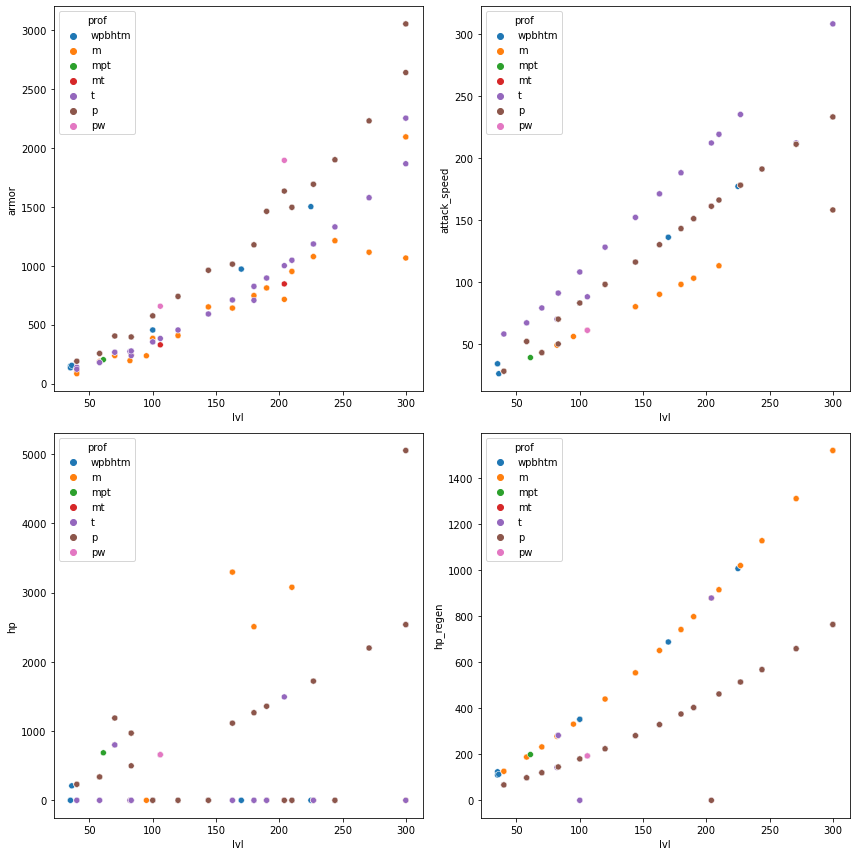

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots showing relation of various stats to lvl
f, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.scatterplot(data=magic_profs_df, x='lvl', y='armor', hue='prof', ax=axs[0][0])
sns.scatterplot(data=magic_profs_df, x='lvl', y='attack_speed', hue='prof', ax=axs[0][1])

sns.scatterplot(data=magic_profs_df, x='lvl', y='health_points', hue='prof', ax=axs[1][0])
sns.scatterplot(data=magic_profs_df, x='lvl', y='hp_regen', hue='prof', ax=axs[1][1])

f.tight_layout()

In [5]:
# Create df for tracker items specifically
tracker_df = armor_dfs['t']

# Copy of original tracker df
tracker_spec = tracker_df.copy()

# Helper function to remove all profs items
def remove_all_prof(x):
    if 'wpbhtm' in x:
        return False
    else:
        return True

# Remove all profs items & leave tracker specific items
tracker_spec = tracker_df[tracker_df.apply(lambda x: remove_all_prof(x['prof']), axis=1)].copy()
    
# Getting rid of lvl after comma in "legbon" column
tracker_spec['legendary_bonus'] = tracker_spec['legendary_bonus'].apply(lambda x: x.split(',')[0]).astype('str')

# Create df for hunter items specifically
hunter_df = armor_dfs['h']

# Copy of original hunter df
hunter_spec = hunter_df.copy()

# Remove all profs items & leave hunter specific items
hunter_spec = hunter_df[hunter_df.apply(lambda x: remove_all_prof(x['prof']), axis=1)].copy() 

# Getting rid of lvl after comma in "legbon" column
hunter_spec['legendary_bonus'] = hunter_spec['legendary_bonus'].apply(lambda x: x.split(',')[0]).astype('str')


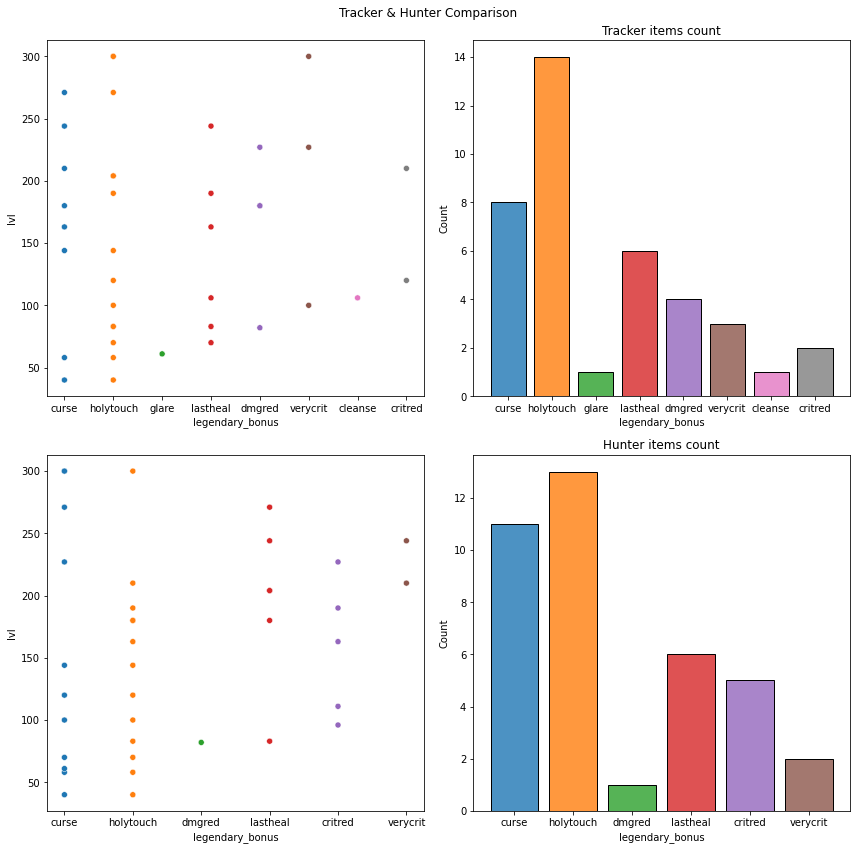

In [6]:
# Plots showing legendary bonuses types on different lvls and on the right their counts 
f, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.scatterplot(data=tracker_spec, x="legendary_bonus", y="lvl", hue="legendary_bonus", legend=False, ax=axs[0][0])
sns.histplot(data=tracker_spec, x="legendary_bonus", hue="legendary_bonus", shrink=.8, alpha=.8, legend=False, ax=axs[0][1]).set(title='Tracker items count')

sns.scatterplot(data=hunter_spec, x="legendary_bonus", y="lvl", hue="legendary_bonus", legend=False, ax=axs[1][0])
sns.histplot(data=hunter_spec, x="legendary_bonus", hue="legendary_bonus", shrink=.8, alpha=.8, legend=False, ax=axs[1][1]).set(title='Hunter items count')

f.suptitle('Tracker & Hunter Comparison')
f.tight_layout()

In [7]:
tracker_spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 3 to 46
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   lvl              39 non-null     int64 
 1   prof             39 non-null     object
 2   name             39 non-null     object
 3   legendary_bonus  39 non-null     object
 4   hp               39 non-null     int32 
 5   hp_regen         39 non-null     int32 
 6   attack_speed     39 non-null     int32 
 7   armor            39 non-null     int32 
 8   all_features     39 non-null     int32 
 9   strength         39 non-null     int32 
 10  agility          39 non-null     int32 
 11  intellect        39 non-null     int32 
dtypes: int32(8), int64(1), object(3)
memory usage: 2.7+ KB


In [8]:
hunter_spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 3 to 45
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   lvl              38 non-null     int64 
 1   prof             38 non-null     object
 2   name             38 non-null     object
 3   legendary_bonus  38 non-null     object
 4   hp               38 non-null     int32 
 5   hp_regen         38 non-null     int32 
 6   attack_speed     38 non-null     int32 
 7   armor            38 non-null     int32 
 8   all_features     38 non-null     int32 
 9   strength         38 non-null     int32 
 10  agility          38 non-null     int32 
 11  intellect        38 non-null     int32 
dtypes: int32(8), int64(1), object(3)
memory usage: 2.7+ KB


In [9]:
# Games features of proffesions comparer
choosen_intervals = [58, 100, 210, 300]

# Helper function
def lvl_chooser(x):
    if x in choosen_intervals:
        return True
    else:
        return False

# Df extraction
pmt_profs = magic_profs_df[magic_profs_df.apply(lambda x: lvl_chooser(x['lvl']), axis=1)].copy()
pmt_profs = pmt_profs[pmt_profs.apply(lambda x: remove_all_prof(x['prof']), axis=1)].copy()
for i in ['strength','agility','intellect']:
    pmt_profs[i] += pmt_profs['all_features']
pmt_profs.drop('all_features', inplace=True, axis=1)
#pmt_profs.drop([16,17], axis=0, inplace=True) -> drop by indexes

# Preparing subset of dfs divided by lvl intervals
def lvl_df_extractor(profs_df):
    lvl_dict = {}
    for i in choosen_intervals:
        lvl_dict[i] = profs_df[profs_df.lvl == i]
    return lvl_dict

pmt = lvl_df_extractor(pmt_profs)

[]

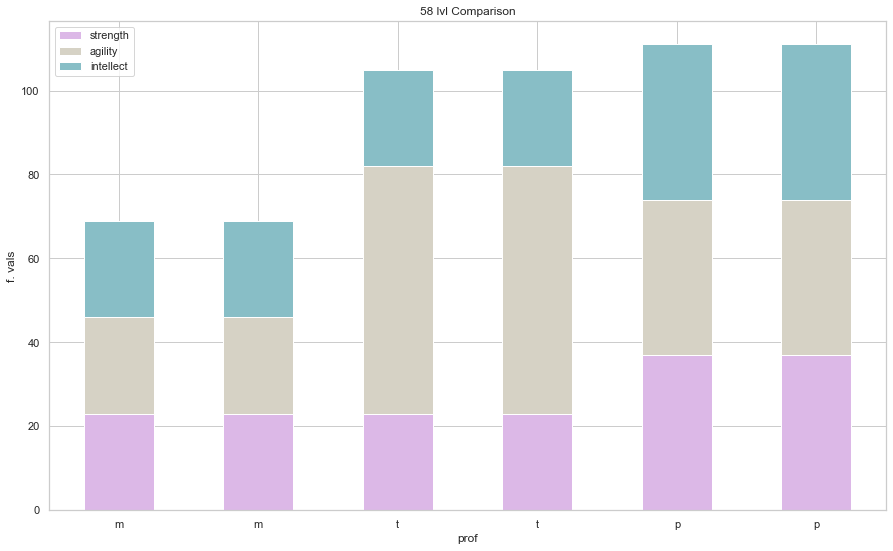

In [26]:
# Set seaborn plotting aesthetics
sns.set(style='whitegrid')

c_set = ['#DCB8E7','#D6D2C5','#88BEC6']

# Create stacked bar chart
pmt[58].plot(kind='bar', x='prof', y=['strength','agility','intellect'], color=c_set, stacked=True, title="58 lvl Comparison", figsize=(15,9), ylabel="f. vals")

plt.xticks(rotation=0)
plt.plot()

[]

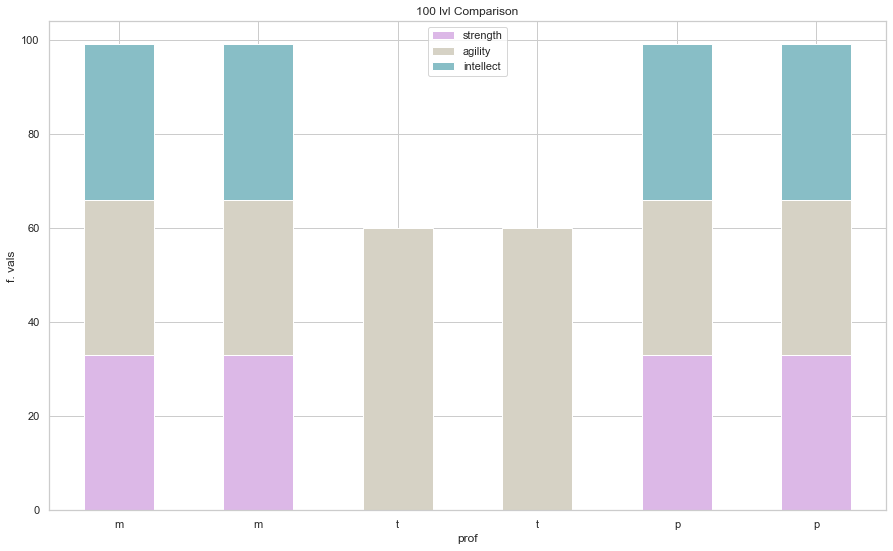

In [27]:
pmt[100].plot(kind='bar', x='prof', y=['strength','agility','intellect'], color=c_set, stacked=True, title="100 lvl Comparison", figsize=(15,9), ylabel="f. vals")

plt.xticks(rotation=0)
plt.plot()

[]

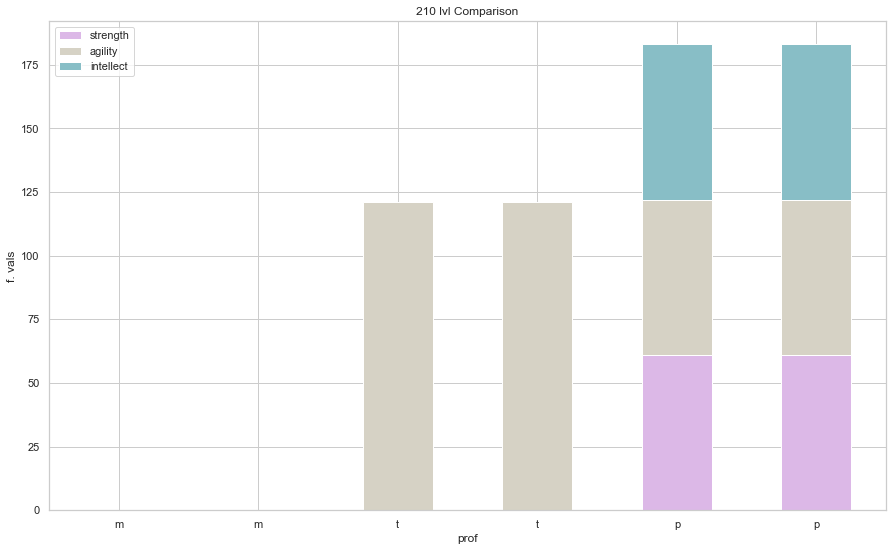

In [28]:
pmt[210].plot(kind='bar', x='prof', y=['strength','agility','intellect'], color=c_set, stacked=True, title="210 lvl Comparison", figsize=(15,9), ylabel="f. vals")

plt.xticks(rotation=0)
plt.plot()

[]

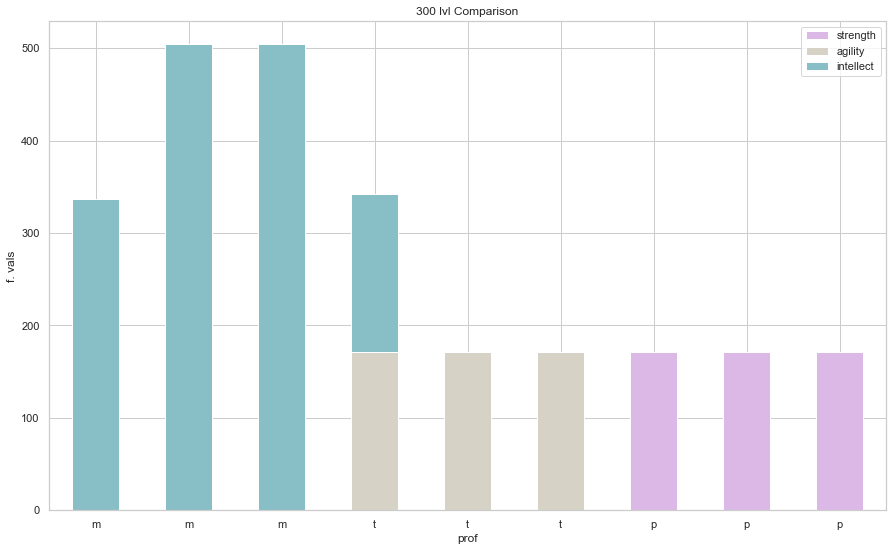

In [29]:
pmt[300].plot(kind='bar', x='prof', y=['strength','agility','intellect'], color=c_set, stacked=True, title="300 lvl Comparison", figsize=(15,9), ylabel="f. vals")

plt.xticks(rotation=0)
plt.plot()